In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import os
import numpy as np
from tensorflow.keras.preprocessing import image

from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

from tensorflow.keras.models import load_model

from PIL import Image

In [2]:
# Пути к данным
circles_dir = 'E://shapes/circles'
squares_dir = 'E://shapes/squares'

# Параметры изображений
img_width, img_height = 150, 150
input_shape = (img_width, img_height, 3)
batch_size = 32

In [3]:
# Загрузка изображений и меток
def load_images_from_folder(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = image.load_img(img_path, target_size=(150, 150))  # Изменение размера изображения
        img = image.img_to_array(img)
        images.append(img)
        labels.append(label)
    return np.array(images), np.array(labels)

# Загрузка данных
circles_images, circles_labels = load_images_from_folder(circles_dir, 0)  # 0 для окружностей
squares_images, squares_labels = load_images_from_folder(squares_dir, 1)  # 1 для квадратов

# Объединение данных
X = np.concatenate([circles_images, squares_images])
y = np.concatenate([circles_labels, squares_labels])

# Разделение данных на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Нормализация данных
X_train = X_train / 255.0
X_test = X_test / 255.0

# Создание модели CNN
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')])

# Компиляция модели
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Обучение модели
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test))

# Сохранение модели
model.save('D://shape_classifier.h5')

# Оценка модели
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

Epoch 1/30


C:\Users\Дмитрий\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 234ms/step - accuracy: 0.4855 - loss: 0.7098 - val_accuracy: 0.4700 - val_loss: 0.6930
Epoch 2/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 233ms/step - accuracy: 0.5371 - loss: 0.6849 - val_accuracy: 0.5300 - val_loss: 0.6770
Epoch 3/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 219ms/step - accuracy: 0.5921 - loss: 0.6534 - val_accuracy: 0.5550 - val_loss: 0.6756
Epoch 4/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 215ms/step - accuracy: 0.6731 - loss: 0.6015 - val_accuracy: 0.6450 - val_loss: 0.6177
Epoch 5/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 216ms/step - accuracy: 0.7535 - loss: 0.5181 - val_accuracy: 0.7550 - val_loss: 0.4965
Epoch 6/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 216ms/step - accuracy: 0.9047 - loss: 0.2406 - val_accuracy: 0.9600 - val_loss: 0.1264
Epoch 7/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 218ms/step - accuracy: 0.9998 - loss: 0.0293 - val_accuracy: 0.9950 - val_loss: 0.0354
Epoch 8/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 219ms/step - accuracy: 0.9982 - loss: 0.0055 - val_accuracy: 0.9900 - val_

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 1.0000 - loss: 0.0059 
Test accuracy: 1.0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


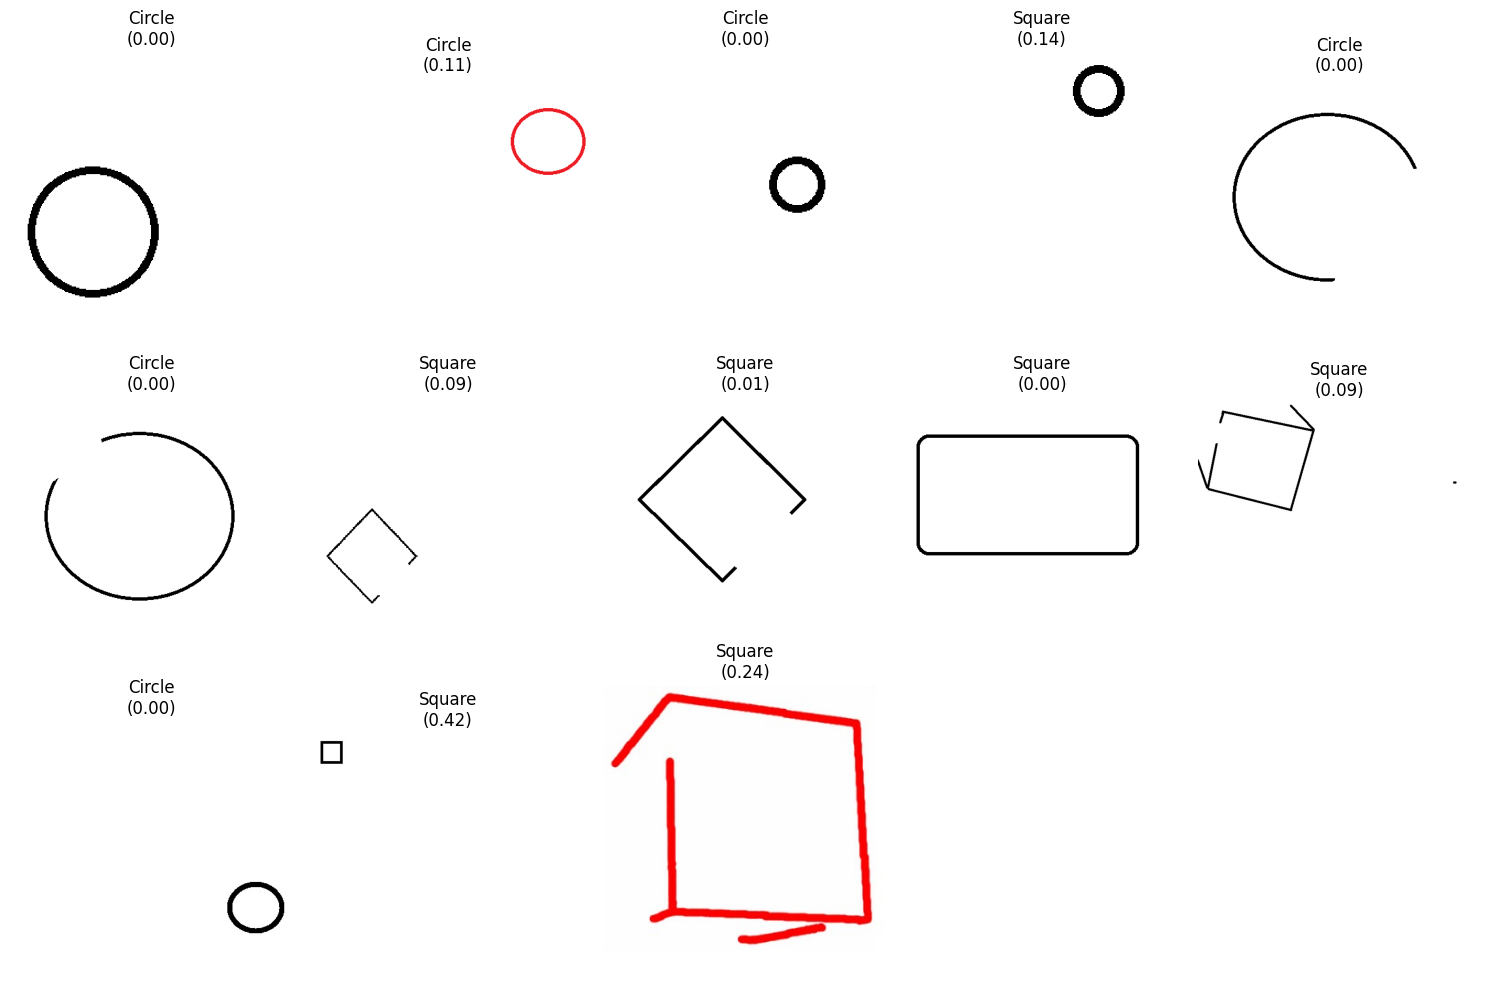

In [4]:
# Загрузка обученной модели
model = tf.keras.models.load_model('D://shape_classifier.h5')

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Путь к тестовой папке
test_dir = 'E:/DataTest'

def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(150, 150))  # Изменение размера изображения
    img_array = image.img_to_array(img)  # Преобразование в массив
    img_array = img_array / 255.0  # Нормализация
    img_array = np.expand_dims(img_array, axis=0)  # Добавление batch-размерности
    return img_array

# Получение списка всех изображений в папке
image_files = [os.path.join(test_dir, f) for f in os.listdir(test_dir) if f.endswith(('.jpg', '.png', '.jpeg'))]

# Создание фигуры для отображения
plt.figure(figsize=(15, 10))

# Обработка и отображение изображений
for i, img_path in enumerate(image_files):
    # Загрузка и предобработка изображения
    img_array = load_and_preprocess_image(img_path)
    
    # Предсказание модели
    prediction = model.predict(img_array)
    class_name = 'Circle' if prediction < 0.5 else 'Square'
    confidence = prediction[0][0] if prediction < 0.5 else 1 - prediction[0][0]
    
    # Отображение изображения
    plt.subplot(len(image_files) // 5 + 1, 5, i + 1)  # 5 изображений в ряд
    img = image.load_img(img_path)
    plt.imshow(img)
    plt.title(f'{class_name}\n({confidence:.2f})')
    plt.axis('off')

plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


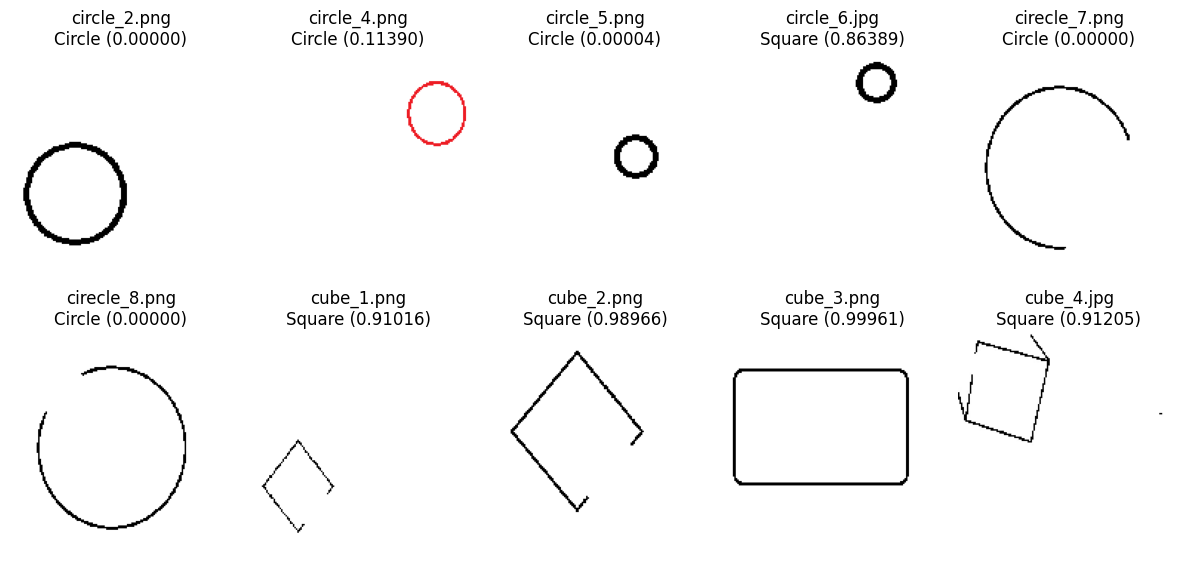

In [5]:
# Пути
model_path = 'D://shape_classifier.h5'
test_dir = 'E://DataTest'

# Загрузка модели
model = load_model(model_path)

# Функция предсказания
def predict_image(img_path, model):
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)  # Добавление размерности для batch
    prediction = model.predict(img_array)[0][0]  # Получение вероятности
    label = "Square" if prediction > 0.5 else "Circle"
    return label, prediction

# Отображение изображений с предсказаниями
plt.figure(figsize=(12, 6))
for i, filename in enumerate(os.listdir(test_dir)[:10]):  # Ограничим 10 изображениями
    img_path = os.path.join(test_dir, filename)
    label, prob = predict_image(img_path, model)
    
    # Отображение
    img = image.load_img(img_path, target_size=(150, 150))
    plt.subplot(2, 5, i + 1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"{filename}\n{label} ({prob:.5f})")

plt.tight_layout()
plt.show()